                                                                     Laura Sanchez, Gaetan Corin, Fabien Vidor, Lou Doussiet
                                                                                                       M1 - M2 Data Engineer
                                                                                                                Février 2024

# Projet Machine Learning

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
#from mlxt#end.plotting import plot_confusion_matrix
from sklearn import preprocessing

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#df = pd.read_csv("Covid_Dataset.csv")
df = pd.read_csv("CovidDataset.csv")

df.rename(columns={'Fatigue ': 'Fatigue'}, inplace=True)

## Compréhension des données

In [2]:
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [4]:
for col in df.columns:
    print(f"Value counts for column {col}:")
    print(df[col].value_counts())
    print()

Value counts for column Breathing Problem:
Breathing Problem
Yes    3620
No     1814
Name: count, dtype: int64

Value counts for column Fever:
Fever
Yes    4273
No     1161
Name: count, dtype: int64

Value counts for column Dry Cough:
Dry Cough
Yes    4307
No     1127
Name: count, dtype: int64

Value counts for column Sore throat:
Sore throat
Yes    3953
No     1481
Name: count, dtype: int64

Value counts for column Running Nose:
Running Nose
Yes    2952
No     2482
Name: count, dtype: int64

Value counts for column Asthma:
Asthma
No     2920
Yes    2514
Name: count, dtype: int64

Value counts for column Chronic Lung Disease:
Chronic Lung Disease
No     2869
Yes    2565
Name: count, dtype: int64

Value counts for column Headache:
Headache
Yes    2736
No     2698
Name: count, dtype: int64

Value counts for column Heart Disease:
Heart Disease
No     2911
Yes    2523
Name: count, dtype: int64

Value counts for column Diabetes:
Diabetes
No     2846
Yes    2588
Name: count, dtype: int64

Va

Conclusion de la comprehension des données : <br>
<br>
Les colonnes Wearing Masks et Sanitazation from Market ne contiennent que des "no".<br>
<br>
La colonne COVID-19 contient 4383 "yes" et 1051 "no".<br>
Comme la colonne COVID-19 est notre cible, le jeu de données est déséquilibré.<br>

### Visualisation

In [5]:
import pandas as pd
import sweetviz as sv
df = pd.read_csv("CovidDataset.csv")
report = sv.analyze(df)
report.show_html('report.html')
## et attendre 30 seconde le temps que le rapport s'affiche dans un nouvel onglet

                                             |                                             | [  0%]   00:00 ->…

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Pré-traitement des données

# Pré-processing

In [6]:
from sklearn import preprocessing

for column in df.columns:
    le = preprocessing.LabelEncoder()
    le.fit(df[column])
    df[column] = le.transform(df[column])

## Définition des caracteristiques et de la cible

In [7]:
X = df.drop(['COVID-19','Wearing Masks', 'Sanitization from Market'], axis = 1)
y = df['COVID-19']

## Experimentation modèle Machine Learning

### Triage des colonnes par correlations avec covid-19

In [8]:
correlations_covid = df.corr()['COVID-19'].sort_values(ascending=False)
print("Colonnes et valeurs de corrélation avec la col covid :")
print(correlations_covid)

colonnes_triees = correlations_covid.sort_values(ascending=False).index
df_triees = df[colonnes_triees]

Colonnes et valeurs de corrélation avec la col covid :
COVID-19                                   1.000000
Sore throat                                0.502848
Dry Cough                                  0.464292
Abroad travel                              0.443875
Breathing Problem                          0.443764
Attended Large Gathering                   0.390145
Contact with COVID Patient                 0.357122
Fever                                      0.352891
Family working in Public Exposed Places    0.160208
Visited Public Exposed Places              0.119755
Hyper Tension                              0.102575
Asthma                                     0.089930
Diabetes                                   0.040627
Heart Disease                              0.027072
Gastrointestinal                          -0.003367
Running Nose                              -0.005657
Headache                                  -0.027793
Fatigue                                   -0.044188
Chronic L

### Adaptation du nombre de colonnes du dataframe suivant le scoring de RandomForestClassifier

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df_clean_for_X = df_triees.drop(['COVID-19','Wearing Masks', 'Sanitization from Market'], axis = 1)
y = df_triees['COVID-19']

for nb_col in [5,7,9,11,12,13,15]:
    top_correlated_columns_name = df_clean_for_X.columns[:nb_col]
    X = df_clean_for_X[top_correlated_columns_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#     RFC = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    RFC = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state = 0)

    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)

    print(nb_col, "COLONNES EN ENTRAINEMENT")
    print(top_correlated_columns_name)
    print(accuracy_score(y_test, y_pred))

5 COLONNES EN ENTRAINEMENT
Index(['Sore throat', 'Dry Cough', 'Abroad travel', 'Breathing Problem',
       'Attended Large Gathering'],
      dtype='object')
0.9477557027225901
7 COLONNES EN ENTRAINEMENT
Index(['Sore throat', 'Dry Cough', 'Abroad travel', 'Breathing Problem',
       'Attended Large Gathering', 'Contact with COVID Patient', 'Fever'],
      dtype='object')
0.9661515820456218
9 COLONNES EN ENTRAINEMENT
Index(['Sore throat', 'Dry Cough', 'Abroad travel', 'Breathing Problem',
       'Attended Large Gathering', 'Contact with COVID Patient', 'Fever',
       'Family working in Public Exposed Places',
       'Visited Public Exposed Places'],
      dtype='object')
0.9676232523914643
11 COLONNES EN ENTRAINEMENT
Index(['Sore throat', 'Dry Cough', 'Abroad travel', 'Breathing Problem',
       'Attended Large Gathering', 'Contact with COVID Patient', 'Fever',
       'Family working in Public Exposed Places',
       'Visited Public Exposed Places', 'Hyper Tension', 'Asthma'],
      dt

## amelioration des hyperparametres avec les colonnes corrélées

In [10]:
from sklearn.model_selection import GridSearchCV

df_clean_for_X = df_triees.drop(['COVID-19','Wearing Masks', 'Sanitization from Market'], axis = 1)
top_correlated_columns_name = df_clean_for_X.columns[:12]
X = df_clean_for_X[top_correlated_columns_name]
y = df_triees['COVID-19']

rfc = RandomForestClassifier(random_state = 0)

parameters = {
    'n_estimators':(10, 20, 50,100),
    'criterion':("gini", "entropy", "log_loss"),
    'max_features':("sqrt", "log2")
}

# grid_search = GridSearchCV(estimator=rfc, param_grid=parameters, cv=5)
grid_search = GridSearchCV(estimator=rfc, param_grid=parameters, scoring='accuracy')

grid_search.fit(X, y)

# Get the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
# print("Best accuracy found:", grid_search.best_score_)

Best parameters found: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 20}


# Entrainement du modèle RandomForestClassifier

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_features= 'sqrt',random_state = 0)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

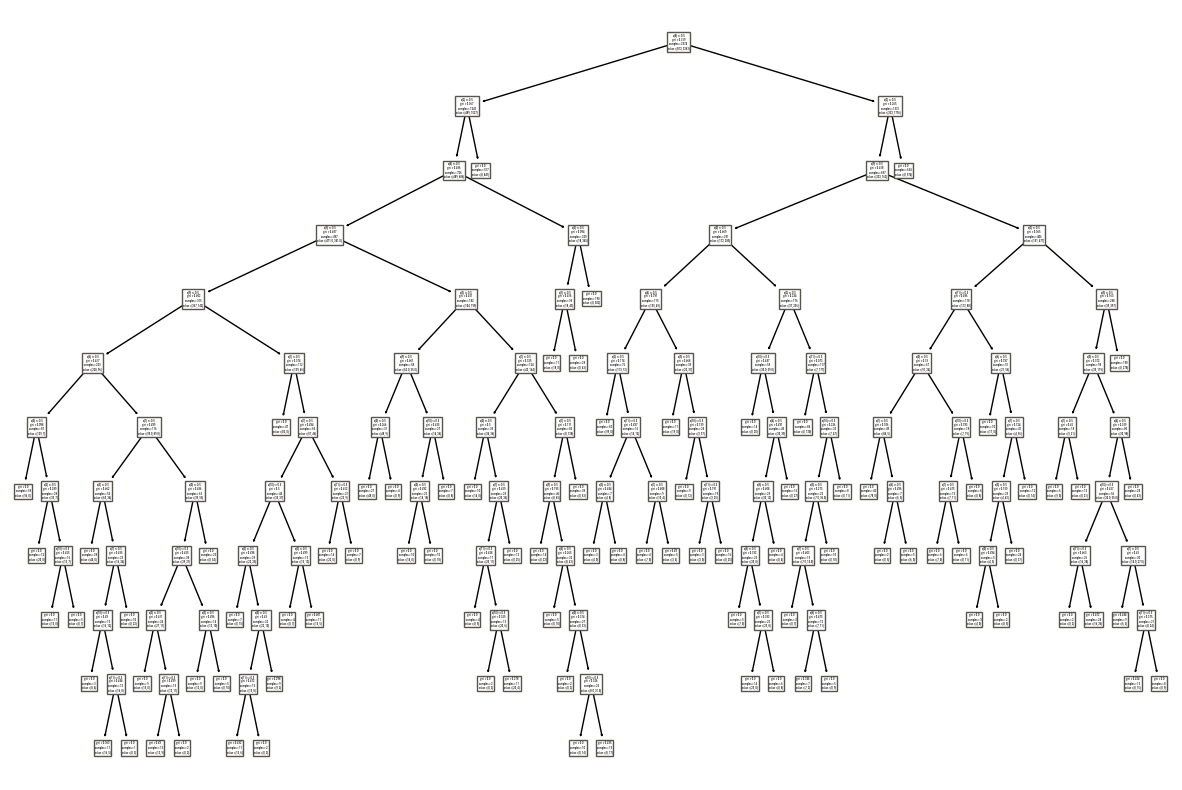

In [13]:
from sklearn import tree
# Extraire un arbre de la forêt (par exemple, le premier arbre)
estimator = RFC.estimators_[0]

# Afficher le premier arbre
fig, ax = plt.subplots(figsize=(15, 10))
# tree.plot_tree(estimator, max_depth=3);
tree.plot_tree(estimator);
plt.show()

In [14]:
y_pred = RFC.predict(X_test)

#### Features importance

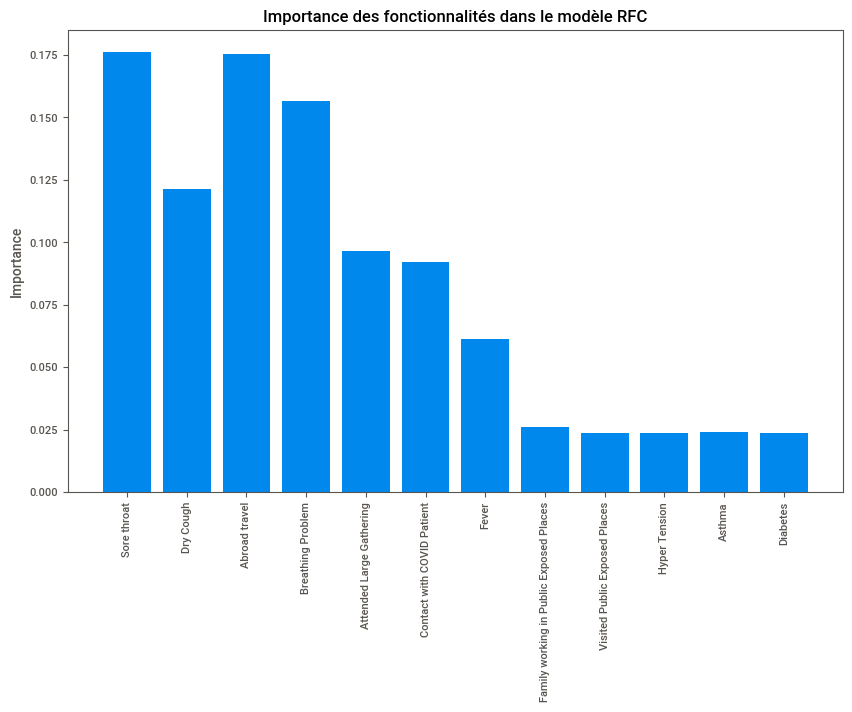

In [15]:
feature_importance = RFC.feature_importances_
feature_names = X_test.columns
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), feature_names, rotation='vertical')
plt.ylabel('Importance')
plt.title('Importance des fonctionnalités dans le modèle RFC')
plt.show()

## Interprétation des Résultats

##### L'accuracy ou exactitude

L'accuracy mesure l’efficacité d’un modèle à prédire correctement à la fois des individus classés positivement et négativement de façon symétrique.
Elle est calculée à partir du rapport entre le nombre d'individus bien classé et le nombre total d'individus dans l’échantillon. 
Son résultat est un nombre décimal compris entre 0 et 1, souvent exprimé en pourcentage, où 0 signifie que le modèle ne sait pas classer les individus et 1 où le modèle classe parfaitement les individus.

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9801324503311258

Notre modèle a une accuracy de 0.98, cela signifie qu'il fait 98% de bonnes prédictions.

##### La matrice de confusion

La matrice de confusion est un outil de mesure de la performance des modèles de classification a 2 classes ou plus. C'est un tableau à quatre valeurs représentant les differentes combinaisons de valeurs réelles et valeurs prédites.

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 249   12]
 [  15 1083]]


<br>
vn, fp ,fn, vp<br>
dans notre cas ces chiffres signifie :<br>
249 vrai négatif : la prédiction est negative et c'est la réalité (le modèle prédit que le patient n'a pas le covid et c'est vrai)<br>
12 faux positif : la prédiction est positive mais ce n'est pas la réalité (le modèle predit que le patient a le covid alors qu'il ne l'a pas)<br>

15 faux négatif : la prédiction est négative mais ce n'est pas la réalité (le modèle predit que le patient n'a pas le covid alors qu'il l'a)<br>
1083 vrai positif : la prédiction est positive et c'est la réalité (le modèle predit que le patient a le Covid et il l'a vraiment)<br>

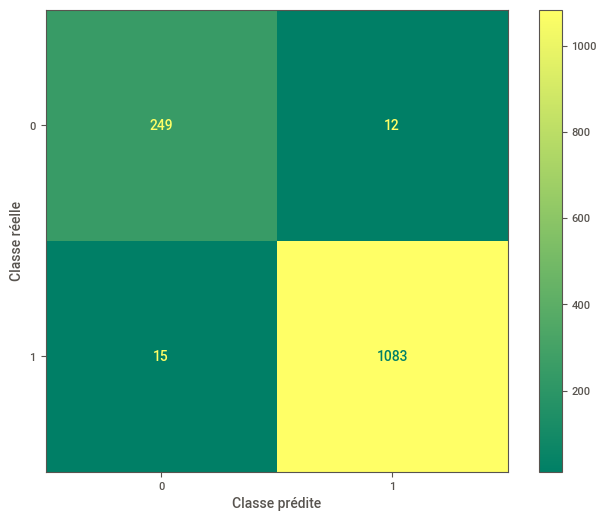

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = RFC.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Créer un objet ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm)

# Définir la taille du graphique
plt.figure(figsize=(8, 6))

# Afficher la matrice de confusion
cm_display.plot(ax=plt.gca(), xticks_rotation='horizontal', cmap='summer')

# Mettre à jour les étiquettes
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')

# Afficher le graphique
plt.show()


##### Le rapport de classification

Le rapport de classification est un outil qui permet de voir les performances d'un modèle de classification.<br>
<br>
Il permet d'évaluer differentes informations :<br>
La Précision c’est la proportion de prédictions correctes parmi les individus que l’on prédit positif. <br>
Le Recall ou sensitivity correspond au nombre d’individus correctement classés. <br>
Le F1 Score est la moyenne harmonique de la précision et du Recall : plus le score est élevé, plus la Précision et le Recall sont élevés. <br>

In [19]:
from sklearn.metrics import classification_report
classe = classification_report(y_test, y_pred)
print(classe)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       261
           1       0.99      0.99      0.99      1098

    accuracy                           0.98      1359
   macro avg       0.97      0.97      0.97      1359
weighted avg       0.98      0.98      0.98      1359



Pour notre modèle, voici les résultats du rapport de classification : <br>
precision = vrais positifs / vrais positifs + faux positifs<br>
Pour la classe 0 (pas malade), la précision est de 94% : Elle indique la proportion d'échantillons prédits comme négatif qui le sont réellement.<br>
Pour la classe 1 (malade), la précision est de 99% : Elle indique la proportion d'échantillons prédits comme positif qui le sont réellement.<br>
<br>
recall = vrais positif / vrais positif + faux négatifs
Pour la classe 0 (pas malade), la précision est de 95% : Il indique la proportion d'échantillons prédits négatifs qui ont été correctement identifiés par le modèle.<br>
Pour la classe 1 (malade), la précision est de 99% : Il indique la proportion d'échantillons prédits positifs qui ont été correctement identifiés par le modèle <br>
<br>
F1 Score = 2 X precision x rappel / precision + rappel<br>
C'est la moyenne harmonique de la précision et du rappel. Il fournit une mesure combinée de la précision et du rappel en un seul nombre.<br>
<br>
Support : C'est le nombre total d'échantillons appartenant à cette classe dans l'ensemble de données.<br>

##### La learning Curve ou courbe d'apprentissage

Elle trace l'évolution des performances du modèle sur l'ensemble d'apprentissage et sur l'ensemble de validation en fonction du nombre d'échantillons utilisés pour l'apprentissage. <br>


In [20]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import learning_curve
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))

    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               cv = 4, scoring = "f1", train_sizes = np.linspace(0.1, 1, 10 ))
    plt.figure(figsize = (8,4))
    plt.plot(N, train_score.mean(axis = 1), label = 'train score')
    plt.plot(N, val_score.mean(axis = 1), label = 'validation score')
    plt.title('Learning Curve',fontsize= 10, fontweight='bold')
    plt.legend()

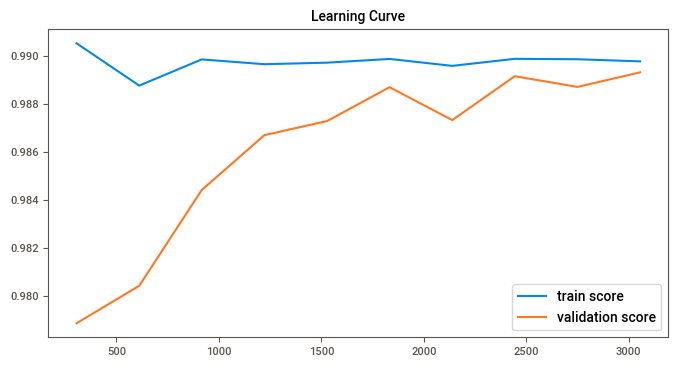

In [21]:
evaluation(RFC)

<br>
Axe des x (abscisse) : Il représente le nombre d'échantillons utilisés pour l'apprentissage. Plus précisément, il s'agit de la taille de l'ensemble d'apprentissage<br>
Axe des y (ordonnée) : Il représente la performance du modèle.<br>
Courbe d'apprentissage (train score) : Cette courbe montre la performance du modèle sur l'ensemble d'apprentissage<br>
Courbe de validation (validation score) : Cette courbe montre la performance du modèle sur l'ensemble de validation (généralement mesurée de la même manière que la courbe d'apprentissage) en fonction de la taille de l'ensemble d'apprentissage. Elle montre comment la performance généralise sur un ensemble de données inconnu à mesure que la taille de l'ensemble d'apprentissage augmente.<br>
<br>

Cette courbe permet de visualiser si le modèle est en underfitting,  overffitting ou convergeance ideale. <br>
underfitting = courbe qui converge vers une performance faible<br>
overfitting = courbe d'apprentissage qui continue de s'ameliorer alors que la courbe alors que la courbe de validation stagne.<br>
convergence ideale = courbe d'apprentissage et courbe de validation qui convergent toutes les deux vers une performance élévé a mesure que la taille d'ensemble augmente. Ce qui indique que le modèle bénéficie de plus de données et généralise bien sur des données inconnues.<br>

Pour notre modèle, il semblerait que nous soyons dans de l'overfitting.<br>
La courbe d'apprentissage commence en haut a gauche puis descend cela signifie que le modèle généralise moins bien sur de nouvelles données.<br>
La distance entre la courbe d'entrainement et la courbe de test est grande ce qui indique du surapprentissage, le modèle est performants sur les données <br>d'entrainement mais pas sur de nouvelles données



##### Learning Curve ou courbe Roc 

La courbe ROC (Receiver Operating Characteristic) est une représentation graphique de la performance d'un modèle de classification binnaire à différents seuils de classification. Elle illustre la relation entre le taux de vrais positifs (TPR) et le taux de faux positifs (FPR) pour différents seuils de classification.

In [22]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, RFC.predict_proba(X)[:, 1])

0.9984820471274166

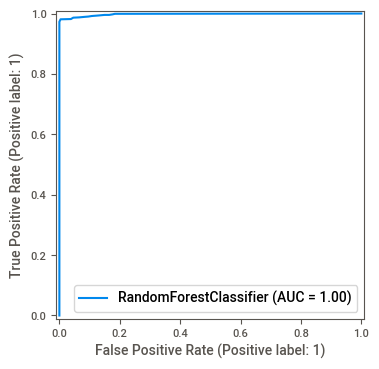

In [23]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))  # Créer une figure et un sous-graphique
RocCurveDisplay.from_estimator(RFC, X_test, y_test, ax=ax)  # Dessiner la courbe ROC sur le sous-graphique
plt.show()


L'axe des x représente le taux de faux positifs (FPR), qui est calculé comme le nombre de faux positifs divisé par la somme des vrais négatifs et des faux positifs. En d'autres termes, il mesure la proportion d'échantillons négatifs incorrectement classés comme positifs.<br>
<br>
L'axe des y représente le taux de vrais positifs (TPR), également appelé rappel ou sensibilité, qui est calculé comme le nombre de vrais positifs divisé par la somme des vrais positifs et des faux négatifs. Il mesure la proportion d'échantillons positifs correctement classés comme positifs.<br>
<br>
Elle permet de voir si le modèle est capabable de bien séparer les classes.<br>

Une ROC de 0,5 correspond à une performance aléatoire, tandis qu'une ROC de 1 indique une performance parfaite.<br>

### Conclusion